In [16]:
#<--------------Examples (based on twitteR vignette)----------------------->
library('twitteR')
setup_twitter_oauth("AhfTjxlw3bMAJSx5LOzM0CfqT", "aixmj9xYpO3bLeTgcSuhLJLGZGchpkQYo6i8j85zejPKLLaXAj", "847585052-7ujhP4Gk68ybAxQUZ8UGuz3IZsxYwD7ihG9xbq0f", "pF4PXgUv1D6Gwl8ZDHN2UGv6TsJRY7a1YI3XkabDRIzlp")


[1] "Using direct authentication"


In [17]:
tweets <- searchTwitter('#iphone8', n=50) #retrieve 50 tweets
head(tweets)


[[1]]
[1] "ange1914: #iPhone8 Expected to Have #3D #Facial Recognition Instead of #TouchID <ed><U+00A0><U+00BD><ed><U+00B8><U+009D>https://t.co/WCLgcc6cKE https://t.co/y5Q66yMK8Q"

[[2]]
[1] "ibrahim55310430: RT @TeknoKulis: 4 bin liral<U+0131>k iPhone 8'de Home tu<U+015F>u olmayacak\n\nhttps://t.co/EOuEzzhuNB #Apple #iPhone8 https://t.co/hLV2ZsVhxt"

[[3]]
[1] "AppleNoticias: Esta podr<U+00ED>a ser la distribuci<U+00F3>n de pantalla del iPhone 8 https://t.co/gXT1AYW81C #iPhone8 #Apple"

[[4]]
[1] "geraramaya14: RT @tecnosivar: Son rumores cada vez m<U+00E1>s fuertes que confirman la carga inal<U+00E1>mbrica en el #iphone8 de #apple<U+2026> https://t.co/8BvSruXJWZ"

[[5]]
[1] "get_like_johnny: Am I the only one excited to get the #Iphone8 IDC how much it cost TBH @Apple"

[[6]]
[1] "k3llz36: RT @iCrackUriDevice: <U+2705> RETWEET if you<U+2019>d want an iPhone 8 GIVEAWAY <ed><U+00A0><U+00BC><ed><U+00BE><U+0081>\n<ed><U+00A0><U+00BD><ed><U+00B3><U+00B1> iPhone 8 - Top <U+2018>Features<U+

In [18]:
Sys.setlocale('LC_ALL','C') #resolve encoding problem while converting to dataframe

[1] "C/C/C/C/C/en_US.UTF-8"

In [19]:
df <- twListToDF(tweets)   #conversion to dataframe
head(df)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
#iPhone8 Expected to Have #3D #Facial Recognition Instead of #TouchID <ed><U+00A0><U+00BD><ed><U+00B8><U+009D>https://t.co/WCLgcc6cKE https://t.co/y5Q66yMK8Q,FALSE,0,NA,2017-02-17 00:17:24,FALSE,NA,832383409339133952,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",ange1914,0,FALSE,FALSE,NA,NA
RT @TeknoKulis: 4 bin liral<U+0131>k iPhone 8'de Home tu<U+015F>u olmayacak https://t.co/EOuEzzhuNB #Apple #iPhone8 https://t.co/hLV2ZsVhxt,FALSE,0,NA,2017-02-17 00:16:13,FALSE,NA,832383111509966849,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",ibrahim55310430,1,TRUE,FALSE,NA,NA
Esta podr<U+00ED>a ser la distribuci<U+00F3>n de pantalla del iPhone 8 https://t.co/gXT1AYW81C #iPhone8 #Apple,FALSE,0,NA,2017-02-17 00:14:30,FALSE,NA,832382681023340544,NA,"<a href=""http://www.hotelroyalmartini.com/BluBirdReactor/"" rel=""nofollow"">BluBirdReactor</a>",AppleNoticias,0,FALSE,FALSE,NA,NA
RT @tecnosivar: Son rumores cada vez m<U+00E1>s fuertes que confirman la carga inal<U+00E1>mbrica en el #iphone8 de #apple<U+2026> https://t.co/8BvSruXJWZ,FALSE,0,NA,2017-02-17 00:07:52,FALSE,NA,832381011656843266,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",geraramaya14,1,TRUE,FALSE,NA,NA
Am I the only one excited to get the #Iphone8 IDC how much it cost TBH @Apple,FALSE,0,NA,2017-02-17 00:04:28,FALSE,NA,832380154445967360,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",get_like_johnny,0,FALSE,FALSE,NA,NA
RT @iCrackUriDevice: <U+2705> RETWEET if you<U+2019>d want an iPhone 8 GIVEAWAY <ed><U+00A0><U+00BC><ed><U+00BE><U+0081> <ed><U+00A0><U+00BD><ed><U+00B3><U+00B1> iPhone 8 - Top <U+2018>Features<U+2019>? <U+27A1><U+FE0F>https://t.co/F44NVyZlwF<U+2B05><U+FE0F> <U+25B2> #iphone8 #<U+2026>,FALSE,0,NA,2017-02-16 23:55:33,FALSE,NA,832377912158482433,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",k3llz36,152,TRUE,FALSE,NA,NA


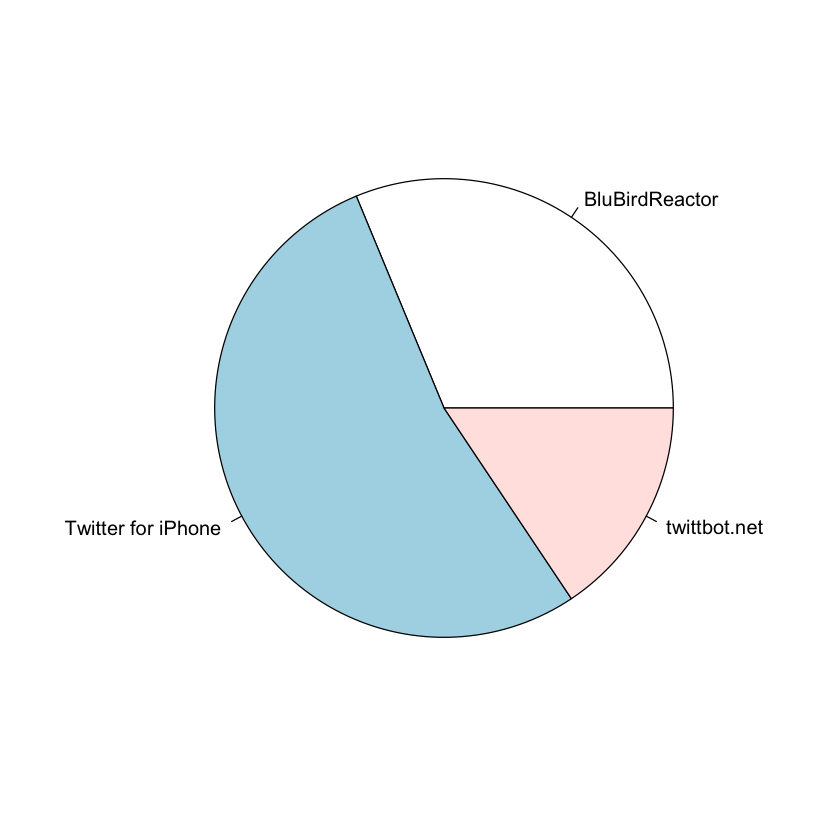

In [20]:
sources <- sapply(tweets, function(x) x$getStatusSource()) #get the sources and plot the pie chart 
sources <- gsub("</a>", "", sources)
sources <- strsplit(sources, ">")
sources <- sapply(sources, function(x) ifelse(length(x) > 1, x[2], x[1]))
source_table = table(sources)
pie(source_table[source_table > 3]) #plot for sources with frequency > 3

In [21]:
head(strip_retweets(tweets, strip_manual=TRUE, strip_mt=TRUE)) #remove retweets

[[1]]
[1] "ange1914: #iPhone8 Expected to Have #3D #Facial Recognition Instead of #TouchID <ed><U+00A0><U+00BD><ed><U+00B8><U+009D>https://t.co/WCLgcc6cKE https://t.co/y5Q66yMK8Q"

[[2]]
[1] "AppleNoticias: Esta podr<U+00ED>a ser la distribuci<U+00F3>n de pantalla del iPhone 8 https://t.co/gXT1AYW81C #iPhone8 #Apple"

[[3]]
[1] "get_like_johnny: Am I the only one excited to get the #Iphone8 IDC how much it cost TBH @Apple"

[[4]]
[1] "RazorSharpDigit: A roundup of the best rumors we've heard about the iPhone 8 @businessinsider  https://t.co/ZkviMYyytp #apple #iphone8"

[[5]]
[1] "Martin_Cook_: Analyst rumor: #iPhone8 'function area' to replace home button https://t.co/XA0NhNFbvo"

[[6]]
[1] "Point_tecno: Gadgets360: Kuo in a new note to has predicted a few more things about the #iPhone8\nhttps://t.co/FZImLyTked"


In [22]:
user <- getUser('serenawilliams')  #user details
user$getDescription()
user$getFollowersCount()


[1] "Living, Loving, and working to help you."

[1] 7712623

In [23]:
user$getFavorites(n=5)

[[1]]
[1] "Burberry: Sir Ernest Shackleton wore @Burberry on his expedition in 1914, which he survived. Discover the world of @Burberry<U+2026> https://t.co/Vapo6VAqD0"

[[2]]
[1] "GreenDay: Have you heard our new album 'Revolution Radio'? Get it on iTunes here.\nhttps://t.co/08bPanIsQQ"

[[3]]
[1] "TracySingian: Seriously, @serenawilliams leads the pack for most entertaining Snapchat stories\n#yaasss"

[[4]]
[1] "v_menichini: H<U+00E9>licopt<U+00E8>re, pelouse envahie, sc<U+00E8>nes surr<U+00E9>alistes. https://t.co/PT5HXyKbDK"

[[5]]
[1] "KishanoH: @serenawilliams so tired of it but we have to continue to fight"


In [24]:
sw_tweets <- userTimeline('serenawilliams')
sw_tweets[1:5]

[[1]]
[1] "serenawilliams: Hope your day is going good <ed><U+00A0><U+00BD><ed><U+00B8><U+0098>#SISwim @si_swimsuit https://t.co/FVf9Jp4sCK"

[[2]]
[1] "serenawilliams: Throwback https://t.co/8OyER7RRSk"

[[3]]
[1] "serenawilliams: Just posted a photo https://t.co/Mp3xRvfD7v"

[[4]]
[1] "serenawilliams: That salsa dance you do when @astonmartin and you meet up and plan amazing things...... #allmine<U+2026> https://t.co/mWBkv7I8cu"

[[5]]
[1] "serenawilliams: Congrats to our #fedcup team. Semifinal bound! Good job ladies xx"


In [25]:
sql_lite_file = tempfile()   #store it in database
register_sqlite_backend(sql_lite_file)
store_tweets_db(tweets)

[1] TRUE

In [26]:
from_db = load_tweets_db()
head(from_db)

[[1]]
[1] "ange1914: #iPhone8 Expected to Have #3D #Facial Recognition Instead of #TouchID <ed><U+00A0><U+00BD><ed><U+00B8><U+009D>https://t.co/WCLgcc6cKE https://t.co/y5Q66yMK8Q"

[[2]]
[1] "ibrahim55310430: RT @TeknoKulis: 4 bin liral<U+0131>k iPhone 8'de Home tu<U+015F>u olmayacak\n\nhttps://t.co/EOuEzzhuNB #Apple #iPhone8 https://t.co/hLV2ZsVhxt"

[[3]]
[1] "AppleNoticias: Esta podr<U+00ED>a ser la distribuci<U+00F3>n de pantalla del iPhone 8 https://t.co/gXT1AYW81C #iPhone8 #Apple"

[[4]]
[1] "geraramaya14: RT @tecnosivar: Son rumores cada vez m<U+00E1>s fuertes que confirman la carga inal<U+00E1>mbrica en el #iphone8 de #apple<U+2026> https://t.co/8BvSruXJWZ"

[[5]]
[1] "get_like_johnny: Am I the only one excited to get the #Iphone8 IDC how much it cost TBH @Apple"

[[6]]
[1] "k3llz36: RT @iCrackUriDevice: <U+2705> RETWEET if you<U+2019>d want an iPhone 8 GIVEAWAY <ed><U+00A0><U+00BC><ed><U+00BE><U+0081>\n<ed><U+00A0><U+00BD><ed><U+00B3><U+00B1> iPhone 8 - Top <U+2018>Features<U+

In [27]:
user_tweets <- userTimeline('serenawilliams')
user_tweets[1:5]

[[1]]
[1] "serenawilliams: Hope your day is going good <ed><U+00A0><U+00BD><ed><U+00B8><U+0098>#SISwim @si_swimsuit https://t.co/FVf9Jp4sCK"

[[2]]
[1] "serenawilliams: Throwback https://t.co/8OyER7RRSk"

[[3]]
[1] "serenawilliams: Just posted a photo https://t.co/Mp3xRvfD7v"

[[4]]
[1] "serenawilliams: That salsa dance you do when @astonmartin and you meet up and plan amazing things...... #allmine<U+2026> https://t.co/mWBkv7I8cu"

[[5]]
[1] "serenawilliams: Congrats to our #fedcup team. Semifinal bound! Good job ladies xx"
